In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def get_avg(x,block=10):
    res=np.zeros((x.shape[0]//block),dtype=x.dtype)
    for i in range(res.shape[0]):
        res[i] = np.mean(x[i*block:(i+1)*block],axis=0)
    return res

In [106]:
nrows=1000
ncols=20000
np.random.seed(42)
dat=1e-6*np.random.randn(nrows*ncols).reshape(nrows,ncols)
nn=2*np.random.randn(nrows*ncols).reshape(nrows,ncols)
rwlks = np.cumsum(dat,axis=1)
rwlks_wnoise = rwlks + nn
fts=np.fft.rfft(rwlks_wnoise,axis=1)
ft_avg=np.mean(fts,axis=0)

# ps = np.mean(np.abs(ft*np.conj(ft)),axis=0)
# cf = np.fft.irfft(ps)/navg
# ft2 = np.fft.rfft(rwlks_wnoise,axis=1)
# ps2 = np.mean(np.abs(ft2*np.conj(ft2)),axis=0)
# ps=np.abs(np.mean(,axis=0))**2
# ps2=np.abs(np.mean(np.fft.rfft(rwlks_wnoise,axis=1),axis=0))**2

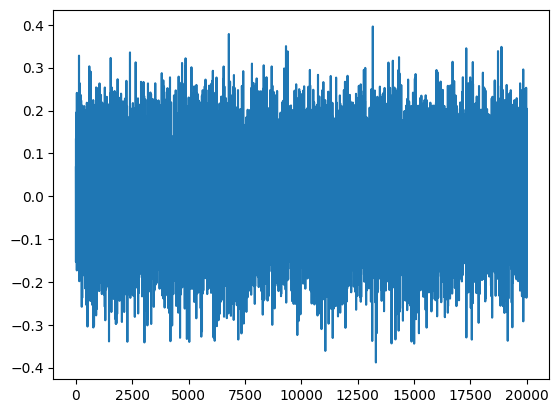

In [101]:
plt.plot(rwlks_wnoise[0,:])

In [107]:
vis=np.exp(1j*rwlks_wnoise[0,:])
print(vis.shape)

(20000,)


In [108]:
np.mean(vis)

(0.13138405325670546-0.00269379425602251j)

In [110]:
sigma=2
print(np.exp(-sigma**2/2))

0.1353352832366127


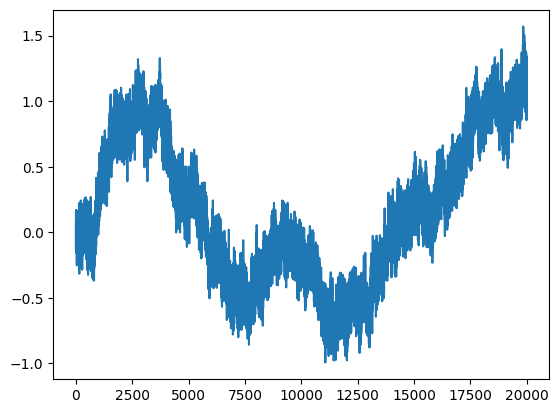

In [88]:
plt.plot(np.angle(vis))

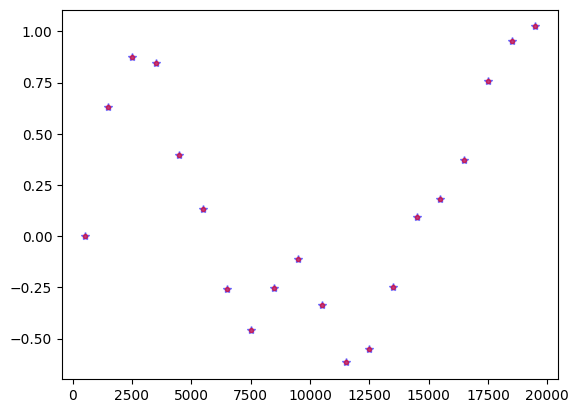

In [98]:
block=1000
phase_avg = get_avg(rwlks_wnoise[0,:],block=block)
vis_avg=get_avg(vis,block=block)
avg_x = np.arange(vis_avg.shape[0])*block + block//2
plt.plot(avg_x,phase_avg,'*',c='blue',alpha=0.5)
plt.plot(avg_x,np.angle(vis_avg),'.',c='red',alpha=0.5)

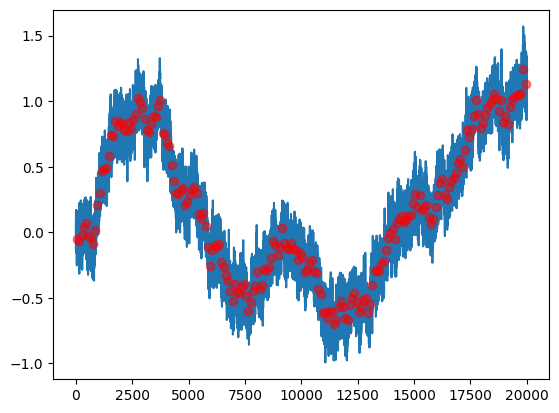

In [92]:
plt.plot(np.angle(vis))
plt.plot(avg_x,np.angle(vis_avg),'o',c='red',alpha=0.5)